In [1]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = sklearn.datasets.make_circles(noise=0.2, factor=0.5, random_state=1)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
y_train = 2*y_train - 1
y_test = 2*y_test - 1
print('Number of training examples:', X_train.shape[0])
print('Number of test examples:', X_test.shape[0])

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# Plot the training points
ax = plt.subplot()
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.1,
           edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
plt.show()

Number of training examples: 60
Number of test examples: 40


In [2]:
import sys
import os
sys.path.insert(0, '../')
from src.svm import HuberSVM

In [3]:
mysvm = HuberSVM()

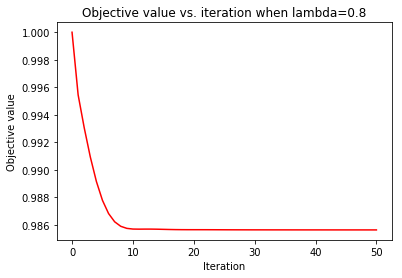

In [8]:
mysvm.fit(X_train, y_train, lam=0.8, **{'plot': True, 'kernel_choice': 'rbf', 'sigma': 1})

In [9]:
beta_vals = mysvm.beta_vals
cache = mysvm.cache

In [10]:
cache

{'eta_init': 0.02139950764272273,
 'kernel_choice': 'rbf',
 'lambda': 0.8,
 'order': None,
 'plot': <matplotlib.axes._subplots.AxesSubplot at 0x7f7fcc307da0>,
 'sigma': 1}

Misclassification error when lambda = 0.8 : 0.05


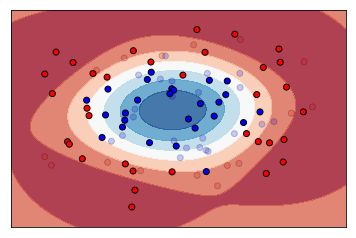

In [11]:
def misclassification_error(beta, X_train, X_test, y_test, kernel, **kwargs):
    n_test = len(y_test)
    y_pred = np.zeros(n_test)
    y_vals = np.zeros(n_test)
    for i in range(n_test):
        y_vals[i] = np.dot(kernel(X_train, X_test[i, :].reshape(1, -1), **kwargs).reshape(-1), beta)
    y_pred = np.sign(y_vals)
    return np.mean(y_pred != y_test), y_vals  # return error and values from before applying cutoff

def evaluate(betas, kernel, **kwargs):
    Zs = np.c_[xx.ravel(), yy.ravel()]
    error, test_values = misclassification_error(betas[-1, :], X_train, X_test, y_test, kernel, **kwargs)
    Z = misclassification_error(betas[-1, :], X_train, Zs, [0]*len(Zs), kernel, **kwargs)[1]
    print('Misclassification error when lambda =', kwargs['lambda'], ':', error)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax = plt.subplot()
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.2)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    plt.show()
    
evaluate(beta_vals, mysvm.gram, **cache)

In [12]:
X.shape

(100, 2)